In [105]:
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite 
import networkx as nx
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [106]:
df = pd.read_csv("../data/input/train.csv")

In [107]:
shape = df.shape

In [108]:
df.head(4)

,label,achiote paste,achiote powder,acini di pepe,acorn squash,active dry yeast,adobo sauce,adobo seasoning,adzuki beans,agave nectar,...,yellow rock sugar,yellow squash,yellow summer squash,yellow tomato,yellowfin tuna,yogurt cheese,yucca root,yukon gold potatoes,yuzu juice,zucchini blossoms
0,Infineon Raceway Baked Beans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sour Cream Noodle Bake,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Middle-Eastern Eggplant Rounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Saffron Jewel Rice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
recipes = pd.Categorical(df.label)
ingredients = df[df.columns[1:]].astype(int)

In [110]:
ingredients

,achiote paste,achiote powder,acini di pepe,acorn squash,active dry yeast,adobo sauce,adobo seasoning,adzuki beans,agave nectar,agave tequila,...,yellow rock sugar,yellow squash,yellow summer squash,yellow tomato,yellowfin tuna,yogurt cheese,yucca root,yukon gold potatoes,yuzu juice,zucchini blossoms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29178,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
G = nx.Graph()
G.add_nodes_from(df['label'], bipartite=0, type='dish')

ingredients = [col for col in df.columns if col != 'label' and df[col].sum() > 0]
G.add_nodes_from(ingredients, bipartite=1, type='ingredient')

for ingredient in ingredients:
    dishes_with_ingredient = df[df[ingredient] == 1]['label']
    for dish in dishes_with_ingredient:
        G.add_edge(dish, ingredient)

In [112]:
conn_gs = nx.connected_components(G)
g_conn_nodes = next(conn_gs)
G.remove_nodes_from(set(G.nodes()).difference(g_conn_nodes))

In [113]:
dishes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
dishes = list(dishes)

In [114]:
degrees = sorted(list(nx.degree(G)), key=lambda x: x[1], reverse=True)
dishes_degrees = [node for node in degrees if node[0] in dishes]
ingredients_degrees = [node for node in degrees if node[0] in ingredients]

In [115]:
ingredients_degrees

[('ground black pepper', 8558),
 ('unsalted butter', 5459),
 ('all-purpose flour', 4865),
 ('olive oil', 4724),
 ('extra-virgin olive oil', 4218),
 ('kosher salt', 3559),
 ('large eggs', 2497),
 ('heavy cream', 2455),
 ('vegetable oil', 1958),
 ('vanilla extract', 1933),
 ('baking powder', 1879),
 ('granulated sugar', 1726),
 ('ground cinnamon', 1686),
 ('freshly ground pepper', 1574),
 ('canola oil', 1378),
 ('lemon juice', 1372),
 ('sour cream', 1361),
 ('baking soda', 1339),
 ('chicken stock', 1308),
 ('whole milk', 1273),
 ('fresh parsley', 1261),
 ('ground cumin', 1260),
 ('chicken broth', 1216),
 ('pure vanilla extract', 1142),
 ('brown sugar', 1134),
 ('light brown sugar', 1132),
 ('cayenne pepper', 1086),
 ('cream cheese', 995),
 ('fresh lemon juice', 964),
 ('soy sauce', 957),
 ('red wine vinegar', 923),
 ('fresh cilantro', 912),
 ('red bell pepper', 858),
 ('cilantro leaves', 843),
 ('hot sauce', 843),
 ('cooking spray', 826),
 ('chili powder', 811),
 ('red pepper flakes', 81

In [116]:
dishes_degrees

[('Chicken Cacciatore', 53),
 ("Shepherd's Pie", 51),
 ('Fried Chicken', 51),
 ('Chicken and Dumplings', 48),
 ('Moussaka', 48),
 ('Chicken Pot Pie', 47),
 ('Chicken Parmesan', 46),
 ('Spaghetti and Meatballs', 44),
 ('Cioppino', 42),
 ('Chicken Tikka Masala', 41),
 ('Chicken Enchiladas', 41),
 ('Beef Stroganoff', 40),
 ('Bouillabaisse', 39),
 ('Stuffed Mushrooms', 38),
 ('Fish Tacos', 38),
 ('Meatloaf', 36),
 ('Corned Beef Hash', 36),
 ('Tortilla Soup', 35),
 ('Lasagna', 35),
 ('Chicken Noodle Soup', 34),
 ('Falafel', 33),
 ('Pecan Pie', 32),
 ('Breakfast Pizza', 32),
 ('French Onion Soup', 32),
 ('Gazpacho', 31),
 ('Gingerbread Cookies', 31),
 ('Shrimp and Grits', 31),
 ('Caesar Salad', 31),
 ('Beef Bourguignon', 31),
 ('Smothered Pork Chops', 31),
 ('Osso Buco', 31),
 ('Green Bean Casserole', 31),
 ('Pasta Primavera', 30),
 ('Crab Cakes', 30),
 ('Sweet and Sour Chicken', 30),
 ('Jerk Chicken', 30),
 ('Pasta Puttanesca', 30),
 ('Apple Crisp', 29),
 ('Fish and Chips', 29),
 ('Red Bean

Basic graph analysis metrics

In [117]:
dishes_nodes, ingredients_nodes = bipartite.sets(G)

degrees_dishes = G.degree(dishes_nodes)
degrees_ingredients = G.degree(ingredients_nodes)

avg_degree_dishes = sum(dict(degrees_dishes).values()) / len(dishes_nodes)
avg_degree_ingredients = sum(dict(degrees_ingredients).values()) / len(ingredients_nodes)

connected_components = list(nx.connected_components(G))

largest_cc = max(nx.connected_components(G), key=len)

density = bipartite.density(G, dishes_nodes)

analysis_summary = {
    "average_degree_dishes": avg_degree_dishes,
    "average_degree_ingredients": avg_degree_ingredients,
    "number_of_connected_components": len(connected_components),
    "largest_connected_component_size": len(largest_cc),
    "density": density,
    "number_of_dishes": len(dishes_nodes),
    "number_of_ingredients": len(ingredients_nodes)
}
analysis_summary

{'average_degree_dishes': 6.70353982300885,
 'average_degree_ingredients': 62.26027397260274,
 'number_of_connected_components': 1,
 'largest_connected_component_size': 30040,
 'density': 0.002295732816098921,
 'number_of_dishes': 27120,
 'number_of_ingredients': 2920}

Dish recommendation based on ingredients

In [118]:
from typing import Literal
ing_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
ingredients_vec = ing_vectorizer.fit_transform(ingredients)

dish_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
dishes_vec = dish_vectorizer.fit_transform(dishes)

def find_best_match(input, input_type: Literal['ingredient', 'dish']):
    if input_type == 'ingredient':
        matrix = ing_vectorizer.transform([input])
        similarities = cosine_similarity(matrix, ingredients_vec).flatten()
        best_match_idx = similarities.argmax()
        return ingredients[best_match_idx]
    elif input_type == 'dish':
        matrix = dish_vectorizer.transform([input])
        similarities = cosine_similarity(matrix, dishes_vec).flatten()
        best_match_idx = similarities.argmax()
        return dishes[best_match_idx]
    else:
        ValueError(f"{input_type} is not a graph subset")

In [119]:
find_best_match('Pasta', 'dish')

'Pasta Salad'

In [120]:
find_best_match('Pasta', 'ingredient')

'dried pasta'

In [121]:
def get_ingredients_for_dish(G, dish_name):
    dish = find_best_match(dish_name, 'dish')
    ingredients = list(G.neighbors(dish))
    return ingredients

In [122]:
get_ingredients_for_dish(G, 'Pasta')

['apple cider vinegar',
 'dried basil',
 'dried oregano',
 'extra-virgin olive oil',
 'fresh basil leaves',
 'garlic cloves',
 'ground black pepper',
 'olive oil',
 'parsley leaves',
 'stone ground mustard',
 'sun-dried tomatoes',
 'yellow squash']

In [123]:
def find_dishes_with_ingredients(G, available_ingredients):
    available_ingredients = set([find_best_match(ingredient, 'ingredient') for ingredient in available_ingredients])
    
    dish_missing_ingredients = {}
    
    for node in G.nodes(data=True):
        if node[1]['type'] == 'dish':
            dish_ingredients = set(G.neighbors(node[0]))
            missing_ingredients = list(dish_ingredients - available_ingredients)
            
            dish_missing_ingredients[node[0]] = missing_ingredients
    
    sorted_dish_info = sorted(dish_missing_ingredients.items(), key=lambda item: len(item[1]))
    sorted_dishes_list = [{dish: missing} for dish, missing in sorted_dish_info]
    
    return sorted_dishes_list

In [124]:
find_dishes_with_ingredients(G, ['chicken', 'pepper'])[:5]

[{'Mini Antipasto Calzones': []},
 {'Glazed Bacon-Wrapped Crackers': []},
 {'Italian Breakfast Skewers': []},
 {'Balsamic Root Vegetables': []},
 {'Sausage Balls': ['onion soup mix']}]

Example visualization

In [125]:
def get_recipe(dish):
    dish = find_best_match(dish, 'dish')
    ingredients = get_ingredients_for_dish(G, dish)
    
    return {dish: ingredients}

In [126]:
get_recipe("Pizza margharitta")

{'Pizza Margherita': ['active dry yeast',
  'all-purpose flour',
  'basil leaves',
  'extra-virgin olive oil',
  'fresh basil',
  'fresh oregano',
  'fresh yeast',
  'freshly ground pepper',
  'mozzarella cheese',
  'olive oil',
  'sea salt',
  'tomato sauce']}

In [137]:
def plot_graph_subset(G, dishes):
    recipes = [get_recipe(dish) for dish in dishes]
    dishes = [list(recipe.keys())[0] for recipe in recipes]
    nodes = set([item for sublist in [[key] + item for dct in recipes for key, item in dct.items()] for item in sublist])

    subgraph = G.subgraph(nodes)

    plt.figure(figsize=(15,10))
    pos = nx.bipartite_layout(subgraph, nodes=dishes)
    nx.draw(subgraph, pos, with_labels=True)
    plt.show()

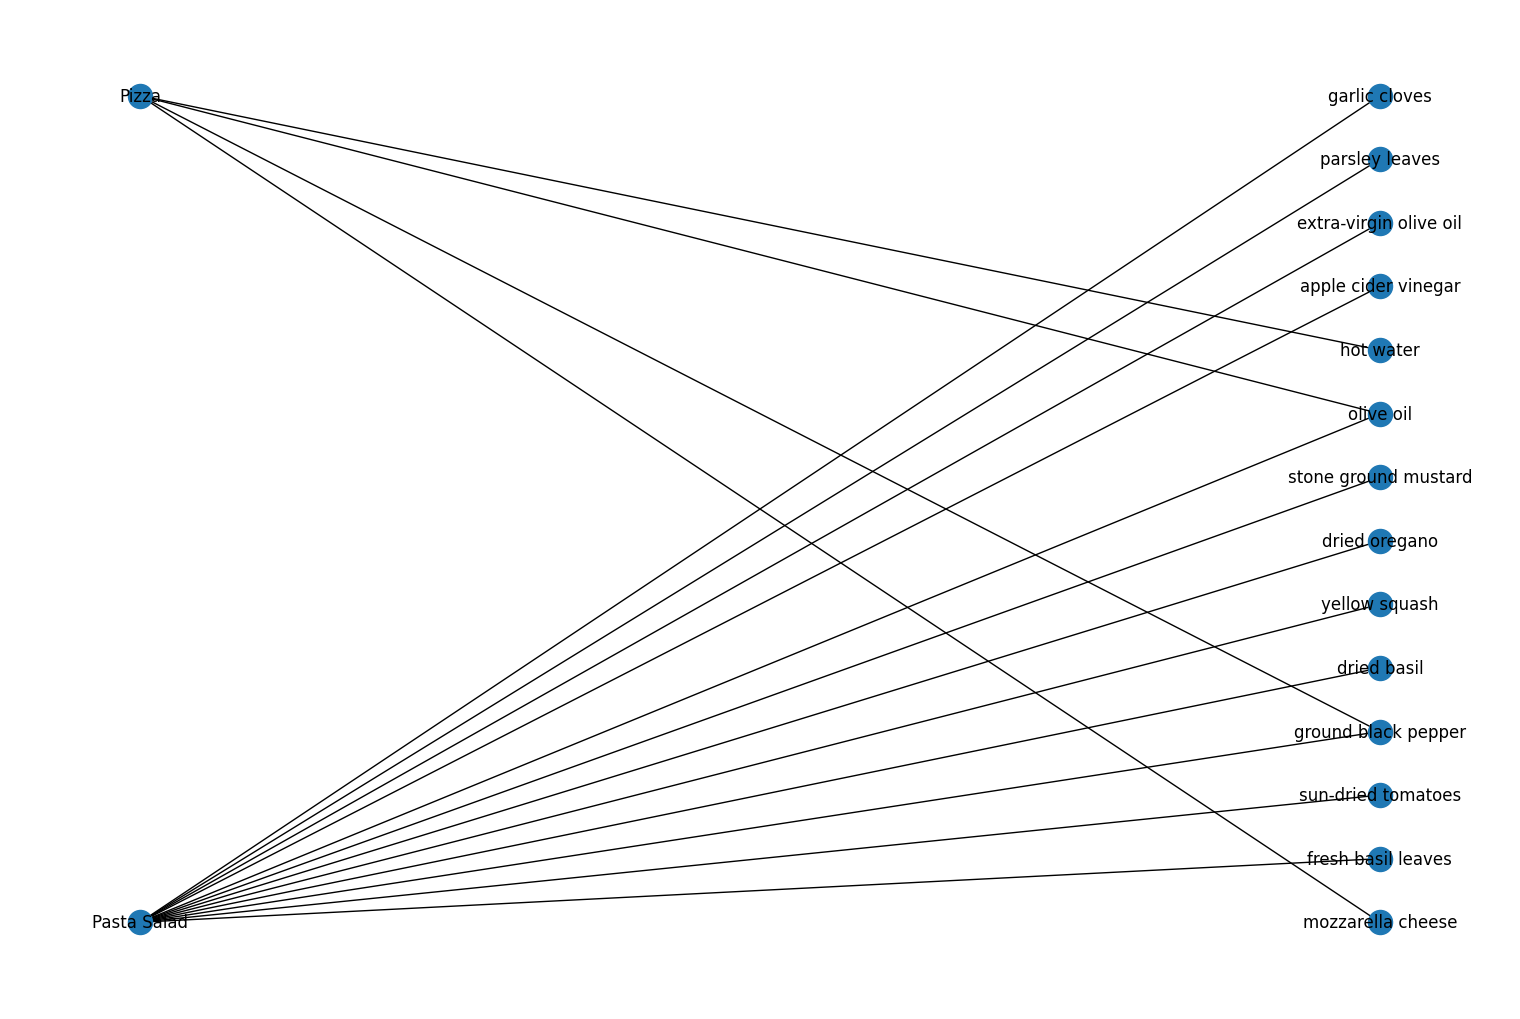

In [138]:
plot_graph_subset(G, ['Pizza', 'pasta'])